In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement (2).csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


###placement_exam_marks = skewed distribution and hence we will use IQR method

<Axes: ylabel='placement_exam_marks'>

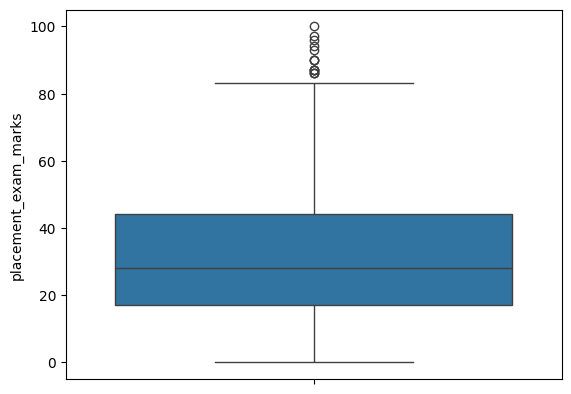

In [4]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
# Finding the IQR
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [9]:
iqr = Q3 - Q1
iqr

np.float64(27.0)

In [11]:
max_lim = Q3 + 1.5*iqr
min_lim = Q1 - 1.5*iqr

In [12]:
print("Upper limit",max_lim)
print("Lower limit",min_lim)

Upper limit 84.5
Lower limit -23.5


###Trimming

In [15]:
df[(df['placement_exam_marks']>max_lim) | (df['placement_exam_marks']<min_lim)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [13]:
new_df = df[(df['placement_exam_marks']<max_lim) & (df['placement_exam_marks']>min_lim)]

In [14]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


###Capping

In [16]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>max_lim,
    max_lim,
    np.where(
        df['placement_exam_marks']<min_lim,
        min_lim,
        df['placement_exam_marks']
    )
)

<Axes: ylabel='placement_exam_marks'>

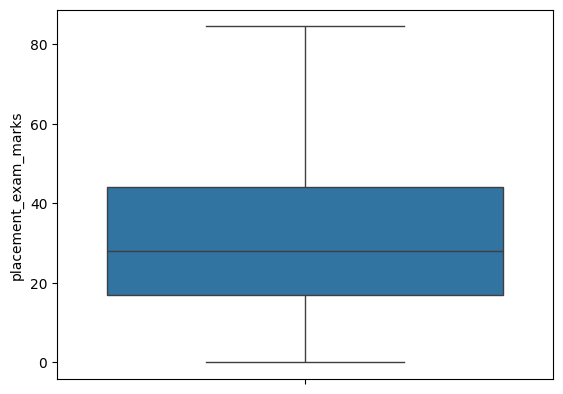

In [18]:
#visual check of df after elimination of outliers by capping
sns.boxplot(df['placement_exam_marks'])